In [35]:
%matplotlib widget

from src.cdk.analysis.cytosol import platereader as pr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import src.cdk.logging

import holoviews as hv
import hvplot.pandas
from holoviews import opts

from bokeh.plotting import figure, show, output_notebook

hv.extension('bokeh')

pr.plot_setup()

data, platemap = pr.load_platereader_data("tests/test_data/cytation_dna_sweep.txt", "tests/test_data/platemap.csv")
data


,Well,Row,Column,Time,Seconds,Temperature (C),Read,Data,Experiment,Name,DNA Template,[DNA Template] (ng/uL)
0,B1,B,1,0 days 00:00:00,0.00,37.00,"490,520",289.00,Concentration,pT7-deGFP 100,pT7-deGFP (AR-11),100.00
1,B1,B,1,0 days 00:05:00,300.00,37.00,"490,520",312.00,Concentration,pT7-deGFP 100,pT7-deGFP (AR-11),100.00
2,B1,B,1,0 days 00:10:00,600.00,37.00,"490,520",449.00,Concentration,pT7-deGFP 100,pT7-deGFP (AR-11),100.00
3,B1,B,1,0 days 00:15:00,900.00,37.00,"490,520",982.00,Concentration,pT7-deGFP 100,pT7-deGFP (AR-11),100.00
4,B1,B,1,0 days 00:20:00,1200.00,37.00,"490,520",1880.00,Concentration,pT7-deGFP 100,pT7-deGFP (AR-11),100.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,C8,C,8,0 days 05:40:00,20400.00,37.00,"490,520",16772.00,Artifact,pT7-deGFP 178.5,pT7-deGFP (AR-11),178.50
1164,C8,C,8,0 days 05:45:00,20700.00,37.00,"490,520",16751.00,Artifact,pT7-deGFP 178.5,pT7-deGFP (AR-11),178.50
1165,C8,C,8,0 days 05:50:00,21000.00,37.00,"490,520",16660.00,Artifact,pT7-deGFP 178.5,pT7-deGFP (AR-11),178.50
1166,C8,C,8,0 days 05:55:00,21300.00,37.00,"490,520",16755.00,Artifact,pT7-deGFP 178.5,pT7-deGFP (AR-11),178.50


In [12]:
# Activate notebook output
output_notebook()

experiment = 'Concentration'
well = 'B1'

df = data[data['Experiment'] == experiment]


b1_seconds = df.loc[df['Well'] == well, 'Seconds']
b1_data = df.loc[df['Well'] == well, 'Data']


# # Create a simple plot
p = figure(title="Example Plot", x_axis_label='x', y_axis_label='y')

p.line(b1_seconds, b1_data, legend_label="Line", line_width=2)

# # Show the plot in the notebook
show(p)


Loading BokehJS ...

Loading BokehJS ...

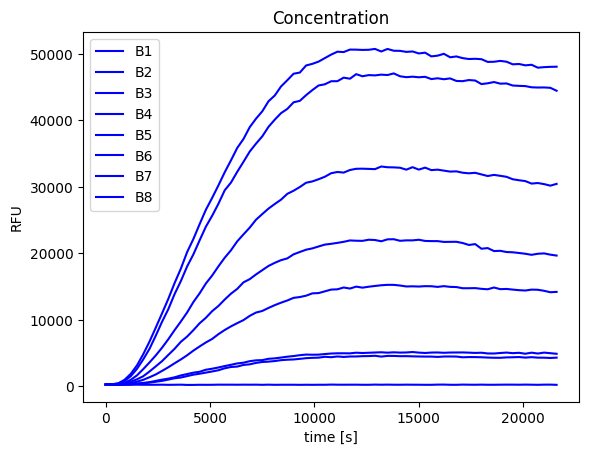

In [42]:
# Activate notebook output
output_notebook()

experiment = 'Concentration'
well = 'B1'

def bokeh_plot_experiment(experiment):

    df = data[data['Experiment'] == experiment]

    well_list = df['Well'].unique().tolist()

    # create a new plot with a title and axis labels
    p = figure(title="Multiple line example", x_axis_label="x", y_axis_label="y")

    for well in well_list:
        well_seconds = df.loc[df['Well'] == well, 'Seconds']
        well_data = df.loc[df['Well'] == well, 'Data']
        p.line(well_seconds, well_data)

    show(p);


def mpl_plot_experiment(experiment):

    df = data[data['Experiment'] == experiment]

    well_list = df['Well'].unique().tolist()

    for well in well_list:
        well_seconds = df.loc[df['Well'] == well, 'Seconds']
        well_data = df.loc[df['Well'] == well, 'Data']
        plt.plot(well_seconds, well_data, label=str(well), color="blue") 

    # Add labels, legend, and title
    plt.xlabel("time [s]")
    plt.ylabel("RFU")
    plt.title(experiment)
    plt.legend()

    plt.show();


# # Data for multiple lines
# x = [0, 1, 2, 3, 4]
# y1 = [0, 1, 4, 9, 16]
# y2 = [0, 2, 8, 18, 32]

# # Create a plot
# plt.plot(x, y1, label="Line 1", color="blue")  # First line
# plt.plot(x, y2, label="Line 2", color="red")   # Second line

# # Add labels, legend, and title
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.title("Multiple Lines Example")
# plt.legend()

# # Show the plot
# plt.show()

# bokeh_plot_experiment(experiment)
mpl_plot_experiment(experiment)


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Enable interactive plotting
%matplotlib inline

# Create a function to plot the data
def plot_data(x, a, b):
    y = a * np.sin(b * x)
    plt.plot(x, y)
    plt.title(f"y = {a} * sin({b} * x)")
    plt.show()

# Create widgets for the parameters
x = np.linspace(0, 2 * np.pi, 100)
a_slider = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='a:')
b_slider = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='b:')

# Use interact to link the widgets to the plotting function
widgets.interact(plot_data, x=widgets.fixed(x), a=a_slider, b=b_slider)

interactive(children=(FloatSlider(value=1.0, description='a:', max=2.0, min=0.1), FloatSlider(value=1.0, descr…

<function __main__.plot_data(x, a, b)>

In [48]:
#| label: app:interactive_image_curve_mpl

# Enable interactive plotting
%matplotlib inline

# Create widgets for the parameters
toggle = widgets.ToggleButtons(
    options=['Artifact', 'Concentration'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

# Use interact to link the widgets to the plotting function
my_widget = widgets.interact(mpl_plot_experiment, experiment=toggle)

# display(my_widget)

interactive(children=(ToggleButtons(description='Speed:', options=('Artifact', 'Concentration'), tooltips=('De…